In [1]:
import cptac
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import re
import statsmodels.stats.multitest as ssm

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 0.9.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-e643e5cdb915>, line 1)
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
files = glob.glob('data/transmutation_effects_permutations/*.csv')
files

['data/transmutation_effects_permutations\\ccrcc_BAP1_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\ccrcc_KDM5C_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\ccrcc_PBRM1_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\ccrcc_SETD2_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\en_ARID1A_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\en_CTCF_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\en_CTNNB1_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\en_KMT2B_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\en_KRAS_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\en_PIK3CA_mutation_effects_permutation.csv',
 'data/transmutation_effects_permutations\\en_PIK3R1_mutation_effects_permutation.csv',
 'data/transmutation_effects_p

In [8]:
dfs = []
for file in files:
    df = pd.read_csv(file)
    mutated_gene = re.search(r'[A-Z0-9]+_mutation', file)
    mutated_gene = mutated_gene.group().strip('_mutation')
    df['mutated_gene'] = [mutated_gene] * len(df)
    df = df.drop(columns = 'Unnamed: 0')
    dfs.append(df)
trans_df = pd.concat(dfs)
trans_df.to_csv('data/transmutation_effects.csv')
trans_df  


,gene,mutated_correlation,non_mutated_correlation,non_mutated_p_vals,mutated_p_vals,delta_correlation,delta_correlation_pval,cancer,sig_mut_pvals,sig_wt_pvals,sig_delta_corr_pval,mutated_gene
0,A1BG,-0.148959,-0.056002,5.939081e-01,0.568276,-0.092957,0.660574,ccrcc,False,False,False,BAP1
1,A1CF,0.868087,0.894054,1.703768e-33,0.000006,-0.025967,0.421580,ccrcc,False,True,False,BAP1
2,A2M,0.160459,0.013361,8.988528e-01,0.538421,0.147098,0.583767,ccrcc,False,False,False,BAP1
3,AAAS,0.286736,0.104553,3.185816e-01,0.264496,0.182183,0.476378,ccrcc,False,False,False,BAP1
4,AACS,0.521260,0.599482,2.166903e-10,0.031893,-0.078222,0.660281,ccrcc,False,True,False,BAP1
...,...,...,...,...,...,...,...,...,...,...,...,...
10060,ZXDC,0.239121,0.208572,9.814131e-02,0.296517,0.030549,0.870989,luad,False,False,False,ZFHX4
10061,ZYG11B,0.407153,0.608459,1.685411e-09,0.028371,-0.201306,0.113923,luad,False,True,False,ZFHX4
10062,ZYX,0.364392,0.428245,6.656714e-05,0.051967,-0.063853,0.723935,luad,False,False,False,ZFHX4
10063,ZZEF1,0.739059,0.647048,6.734598e-11,0.000005,0.092010,0.480132,luad,True,True,False,ZFHX4


In [10]:
trans_df[trans_df.delta_correlation_pval.isna()]

,gene,mutated_correlation,non_mutated_correlation,non_mutated_p_vals,mutated_p_vals,delta_correlation,delta_correlation_pval,cancer,sig_mut_pvals,sig_wt_pvals,sig_delta_corr_pval,mutated_gene
138,ACTL8,0.669183,0.157475,0.590813,0.100179,0.511707,NaN,ccrcc,False,False,False,BAP1
149,ACTRT1,0.438510,0.001675,0.991707,0.325022,0.436835,NaN,ccrcc,False,False,False,BAP1
254,AGR3,0.595598,0.399500,0.005403,0.090592,0.196098,NaN,ccrcc,False,False,False,BAP1
305,AKR1B15,0.241511,0.116609,0.366750,0.474336,0.124902,NaN,ccrcc,False,False,False,BAP1
383,AMY2A,-0.949893,0.550034,0.258152,0.050107,-1.499927,NaN,ccrcc,False,False,False,BAP1
...,...,...,...,...,...,...,...,...,...,...,...,...
9519,SULT6B1,-0.130142,-0.063546,0.648027,0.377971,-0.066596,NaN,hnscc,False,False,False,TTN
10327,TSPY3,NaN,0.845621,0.004079,NaN,NaN,NaN,hnscc,False,False,False,TTN
10383,TUBA3C,-0.314962,0.240169,0.164622,0.084382,-0.555131,NaN,hnscc,False,False,False,TTN
10884,WNT8A,0.982427,0.006979,0.988152,0.002789,0.975447,NaN,hnscc,False,False,False,TTN


In [7]:
dfs = []
for cancer in pd.unique(trans_df.cancer):
    df = trans_df[trans_df.cancer == cancer]
    df = df.dropna()
    df['delta_correlation_qval'] = ssm.fdrcorrection(df.delta_correlation_pval)[1]
    dfs.append(df)
trans_df = pd.concat(dfs)
trans_df

,gene,mutated_correlation,non_mutated_correlation,non_mutated_p_vals,mutated_p_vals,delta_correlation,delta_correlation_pval,cancer,sig_mut_pvals,sig_wt_pvals,sig_delta_corr_pval,mutated_gene,delta_correlation_qval
0,A1BG,0.082642,0.137224,2.403960e-01,6.585054e-01,-0.054582,0.810777,lscc,False,False,False,FAM135B,0.992068
1,A2M,0.397737,0.328181,4.047116e-03,2.189353e-02,0.069555,0.715260,lscc,False,False,False,FAM135B,0.984655
2,A2ML1,0.824626,0.837635,7.442189e-21,3.632005e-09,-0.013009,0.758671,lscc,True,True,False,FAM135B,0.988798
3,A4GALT,0.421327,0.260439,7.705206e-02,4.525727e-02,0.160888,0.403787,lscc,False,False,False,FAM135B,0.970039
4,AAAS,0.351924,0.206740,7.513664e-02,4.459406e-02,0.145184,0.450312,lscc,False,False,False,FAM135B,0.970487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10060,ZXDC,0.239121,0.208572,9.814131e-02,2.965167e-01,0.030549,0.870989,luad,False,False,False,ZFHX4,0.988020
10061,ZYG11B,0.407153,0.608459,1.685411e-09,2.837130e-02,-0.201306,0.113923,luad,False,True,False,ZFHX4,0.878145
10062,ZYX,0.364392,0.428245,6.656714e-05,5.196701e-02,-0.063853,0.723935,luad,False,False,False,ZFHX4,0.972798
10063,ZZEF1,0.739059,0.647048,6.734598e-11,4.671144e-06,0.092010,0.480132,luad,True,True,False,ZFHX4,0.943872


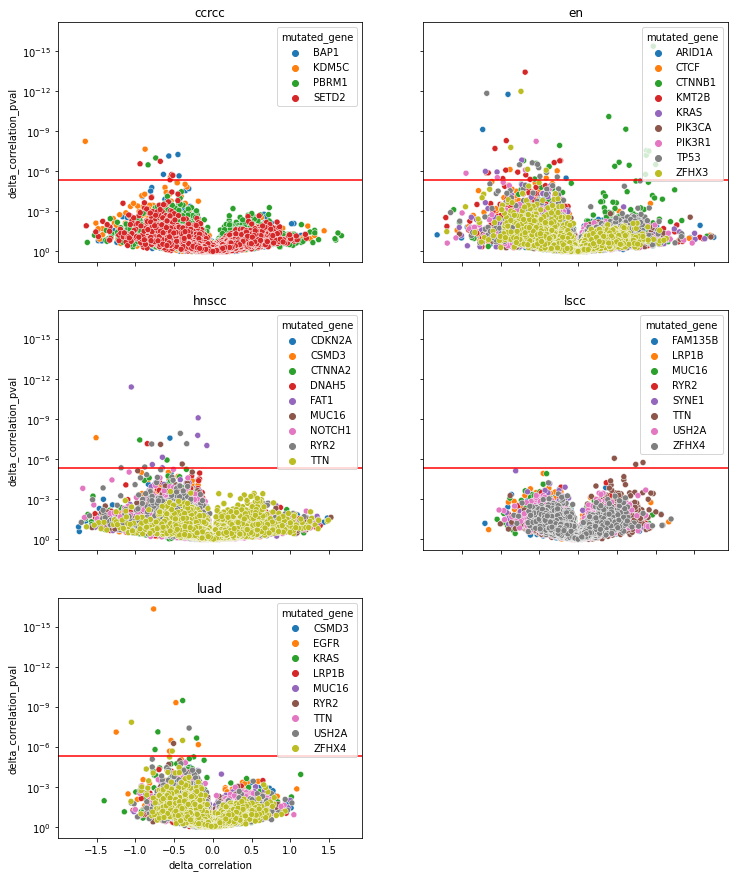

In [5]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True,
                        figsize=(12,15))
cancers = list(pd.unique(trans_df.cancer))
fig.delaxes(axes[2,1])
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.cancer == cancer]
    plt.subplot(ax)
    sns.scatterplot(data = df, x = 'delta_correlation', y= 'delta_correlation_pval', hue = 'mutated_gene')
    ax.invert_yaxis()
    ax.set_yscale('log')
    #for x,y,z in zip(sig_corr_change_df['delta_correlation'], sig_corr_change_df['delta_correlation_pval'], sig_corr_change_df['gene']):    
    #    plt.text(x = x, y = y * .9, s = z, color = 'black', rotation = 45)
    plt.axhline(y = 0.05 / len(pd.unique(df.gene)), color = 'r')
    plt.title(cancer)

In [15]:
perm_df = pd.read_csv('data/full_10k_permutation_corrected.csv')
perm_df = perm_df.melt(id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')
sig_perm_df = perm_df[perm_df['perm_pval'] < 0.05]

,Cancer,Gene,perm_pval
0,ccrcc,A1BG,0.146442
1,en,A1BG,0.883318
2,luad,A1BG,0.801031
3,hnscc,A1BG,0.998985
4,lscc,A1BG,0.183336
...,...,...,...
68340,ccrcc,ZZZ3,0.378694
68341,en,ZZZ3,0.383779
68342,luad,ZZZ3,0.000043
68343,hnscc,ZZZ3,0.854269


In [23]:
len(pd.unique(sig_perm_df['Gene']))

9767

In [20]:
dfs = []
for cancer in pd.unique(trans_df.cancer):
    cancer_sig_perm_df = sig_perm_df[sig_perm_df.Cancer == cancer]
    cancer_trans_df = trans_df[trans_df.cancer == cancer]
    cancer_trans_df= cancer_trans_df[cancer_trans_df.gene.isin(cancer_sig_perm_df.Gene)]
    dfs.append(cancer_trans_df)
sig_change_trans_df = pd.concat(dfs)
sig_change_trans_df

,gene,mutated_correlation,non_mutated_correlation,non_mutated_p_vals,mutated_p_vals,delta_correlation,delta_correlation_pval,cancer,sig_mut_pvals,sig_wt_pvals,sig_delta_corr_pval,mutated_gene
1,A1CF,0.868087,0.894054,1.703768e-33,0.000006,-0.025967,0.421580,ccrcc,False,True,False,BAP1
7,AAGAB,0.553782,0.698057,7.447087e-15,0.021089,-0.144275,0.344901,ccrcc,False,True,False,BAP1
8,AAK1,0.457000,0.658945,6.955795e-13,0.065150,-0.201945,0.209381,ccrcc,False,True,False,BAP1
9,AAMP,0.589846,0.683018,4.631361e-14,0.012694,-0.093172,0.559984,ccrcc,False,True,False,BAP1
11,AARS,0.754498,0.769174,2.163142e-19,0.000465,-0.014675,0.421288,ccrcc,False,True,False,BAP1
...,...,...,...,...,...,...,...,...,...,...,...,...
10059,ZWINT,0.777033,0.742261,6.354725e-08,0.001076,0.034772,0.745486,luad,False,True,False,ZFHX4
10061,ZYG11B,0.407153,0.608459,1.685411e-09,0.028371,-0.201306,0.113923,luad,False,True,False,ZFHX4
10062,ZYX,0.364392,0.428245,6.656714e-05,0.051967,-0.063853,0.723935,luad,False,False,False,ZFHX4
10063,ZZEF1,0.739059,0.647048,6.734598e-11,0.000005,0.092010,0.480132,luad,True,True,False,ZFHX4


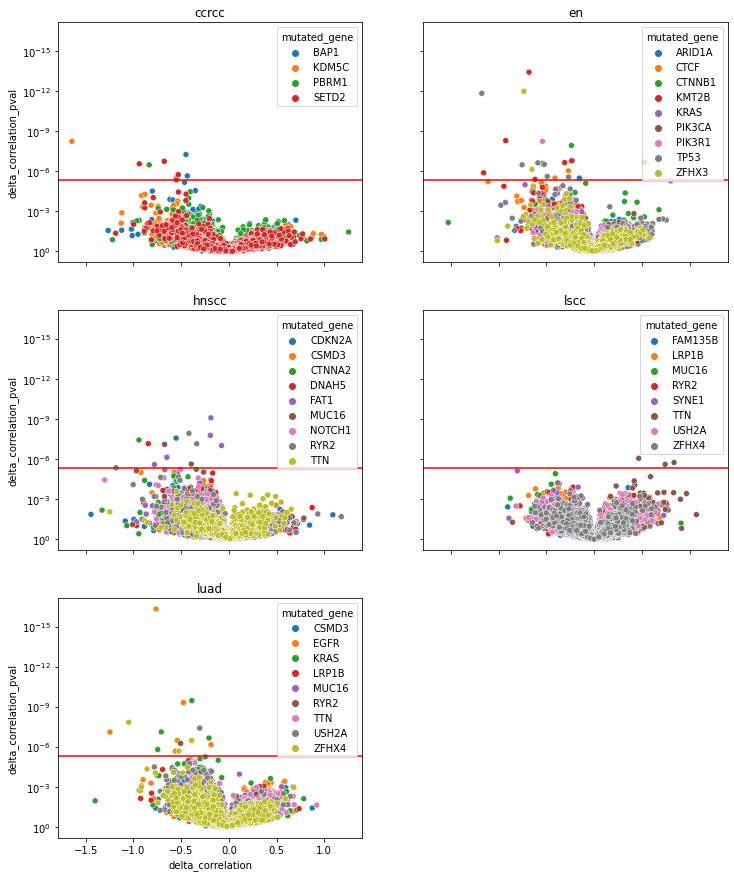

In [22]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True,
                        figsize=(12,15))
cancers = list(pd.unique(sig_change_trans_df.cancer))
fig.delaxes(axes[2,1])
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = sig_change_trans_df[sig_change_trans_df.cancer == cancer]
    plt.subplot(ax)
    sns.scatterplot(data = df, x = 'delta_correlation', y= 'delta_correlation_pval', hue = 'mutated_gene')
    ax.invert_yaxis()
    ax.set_yscale('log')
    #for x,y,z in zip(sig_corr_change_df['delta_correlation'], sig_corr_change_df['delta_correlation_pval'], sig_corr_change_df['gene']):    
    #    plt.text(x = x, y = y * .9, s = z, color = 'black', rotation = 45)
    plt.axhline(y = 0.05 / len(pd.unique(trans_df[trans_df.cancer == cancer].gene)), color = 'r')
    plt.title(cancer)

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True,
                        figsize=(12,15))
cancers = list(pd.unique(sig_change_trans_df.cancer))
fig.delaxes(axes[2,1])
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = sig_change_trans_df[sig_change_trans_df.cancer == cancer]
    plt.subplot(ax)
    sns.scatterplot(data = df, x = 'delta_correlation', y= 'delta_correlation_pval', hue = 'mutated_gene')
    ax.invert_yaxis()
    ax.set_yscale('log')
    #for x,y,z in zip(sig_corr_change_df['delta_correlation'], sig_corr_change_df['delta_correlation_pval'], sig_corr_change_df['gene']):    
    #    plt.text(x = x, y = y * .9, s = z, color = 'black', rotation = 45)
    plt.axhline(y = 0.05 / len(pd.unique(trans_df[trans_df.cancer == cancer].gene)), color = 'r')
    plt.title(cancer)